# Building a Comprehensive Video Game Recommendation System

## Introduction
In the rapidly growing video game industry, players often face the challenge of discovering new games that match their interests and preferences. With thousands of games released across various platforms and genres, finding the next game to play can be overwhelming. This project aims to address this challenge by developing a comprehensive video game recommendation system.

Leveraging the `Video Game Sales with Ratings` dataset from Kaggle, our objective is to create a recommender system that suggests video games based on user preferences and game similarities. The dataset includes key information about video games such as titles, platforms, release years, genres, sales figures, and ratings, providing a rich source of data for building our models.

We will explore multiple recommendation approaches to ensure a robust and versatile system:
1. **Cosine Similarity-Based Recommender:** A content-based approach that measures the similarity between games based on their attributes.
2. **Simple Recommender:** A non-personalized recommendation method that suggests popular games based on sales and ratings.
3. **Content-Based Recommender:** Utilizes text-based features like game descriptions to find similar games.
4. **Collaborative Filtering:** A personalized recommendation method that leverages user interaction data to suggest games.

The project will be structured as follows:
1. **Dataset Overview:** Introducing the dataset and its features.
2. **Exploratory Data Analysis (EDA):** Performing a detailed analysis to understand data distributions, trends, and patterns.
3. **Data Cleaning and Preprocessing:** Preparing the data by handling missing values, outliers, and encoding categorical variables.
4. **Feature Selection:** Identifying the most relevant features for building effective recommendation models.
5. **Model Training:** Implementing and training multiple recommendation models.
6. **Model Evaluation:** Evaluating the performance of each model using appropriate metrics.
7. **Comparison and Final Model Selection:** Comparing the models and selecting the best performing one.

Through this comprehensive approach, we aim to deliver a recommendation system that enhances the gaming experience by providing personalized and relevant game suggestions.

## Dataset Overview
The Dataset Overview section provides a comprehensive introduction to the Video_Games_Sales_as_at_22_Dec_2016.csv dataset. This dataset contains information about video game sales across various platforms up to December 22, 2016. It includes key features such as game titles, platforms, release years, genres, sales figures across different regions, and critic and user ratings. This section will load the dataset, display its structure, and summarize the main characteristics of the data, laying the foundation for further analysis and model building.

In [1]:
# Importing necessary libraries
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
file_path = '../data/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display the summary of the dataset
print("\nDataset summary:")
display(df.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2

None

In [4]:
# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())


Basic statistics for numerical columns:


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
# Display the list of columns and their descriptions
print("\nList of columns:")
columns = {
    'Name': 'Name of the video game',
    'Platform': 'Platform of the video game release (e.g., PS4, Xbox One, PC)',
    'Year_of_Release': 'Year of release of the video game',
    'Genre': 'Genre of the video game (e.g., Action, Sports, RPG)',
    'Publisher': 'Publisher of the video game',
    'NA_Sales': 'Sales in North America (in millions)',
    'EU_Sales': 'Sales in Europe (in millions)',
    'JP_Sales': 'Sales in Japan (in millions)',
    'Other_Sales': 'Sales in other regions (in millions)',
    'Global_Sales': 'Total worldwide sales (in millions)',
    'Critic_Score': 'Aggregate score compiled by Metacritic staff (0-100)',
    'Critic_Count': 'Number of critic reviews counted towards the Critic Score',
    'User_Score': 'Score by Metacritic’s subscribers (0-10)',
    'User_Count': 'Number of user reviews counted towards the User Score',
    'Developer': 'Developer of the video game',
    'Rating': 'ESRB rating (e.g., E for Everyone, M for Mature)',
}
for col, desc in columns.items():
    print(f"{col}: {desc}")


List of columns:
Name: Name of the video game
Platform: Platform of the video game release (e.g., PS4, Xbox One, PC)
Year_of_Release: Year of release of the video game
Genre: Genre of the video game (e.g., Action, Sports, RPG)
Publisher: Publisher of the video game
NA_Sales: Sales in North America (in millions)
EU_Sales: Sales in Europe (in millions)
JP_Sales: Sales in Japan (in millions)
Other_Sales: Sales in other regions (in millions)
Global_Sales: Total worldwide sales (in millions)
Critic_Score: Aggregate score compiled by Metacritic staff (0-100)
Critic_Count: Number of critic reviews counted towards the Critic Score
User_Score: Score by Metacritic’s subscribers (0-10)
User_Count: Number of user reviews counted towards the User Score
Developer: Developer of the video game
Rating: ESRB rating (e.g., E for Everyone, M for Mature)


In [6]:
# Display the number of missing values in each column
print("\nNumber of missing values in each column:")
display(df.isnull().sum())


Number of missing values in each column:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

**Summary of Dataset Overview**

In this section, we have loaded the `Video_Games_Sales_as_at_22_Dec_2016.csv` dataset and provided an overview of its structure and contents. We displayed the first few rows to get an initial glimpse of the data, summarized the dataset's attributes, and highlighted the key features. Additionally, we listed the columns with their descriptions and identified missing values in the dataset. This comprehensive overview sets the stage for deeper exploratory data analysis and subsequent steps in building our recommendation system.

## Exploratory Data Analysis (EDA)
The Exploratory Data Analysis (EDA) section aims to explore the `Video_Games_Sales_as_at_22_Dec_2016.csv` dataset in depth to understand its structure, distributions, and relationships between features. This step is crucial for uncovering insights and patterns that will guide the subsequent data preprocessing and model-building phases. We will use a variety of statistical summaries and visualizations to examine the distributions of sales figures, genre popularity, platform trends, and ratings. This comprehensive analysis will help identify any anomalies, trends, and key characteristics of the data.

In [7]:
# Setting up visual styles
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# Displaying the first few rows of the dataset again for reference
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


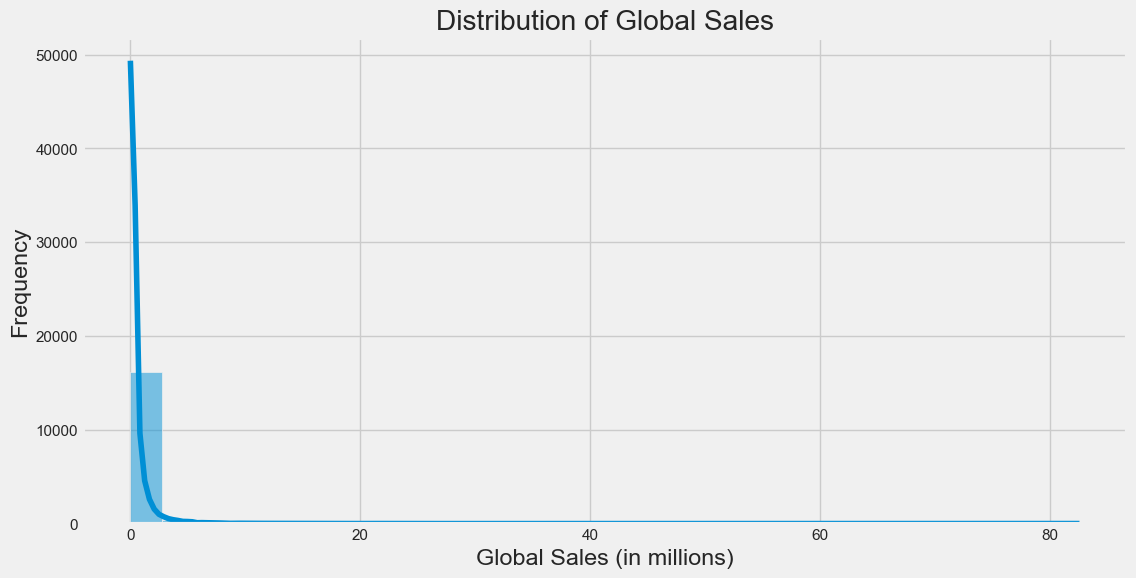

In [8]:
# 1. Distribution of Global Sales
plt.figure(figsize=(12, 6))
sns.histplot(df['Global_Sales'], kde=True, bins=30)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

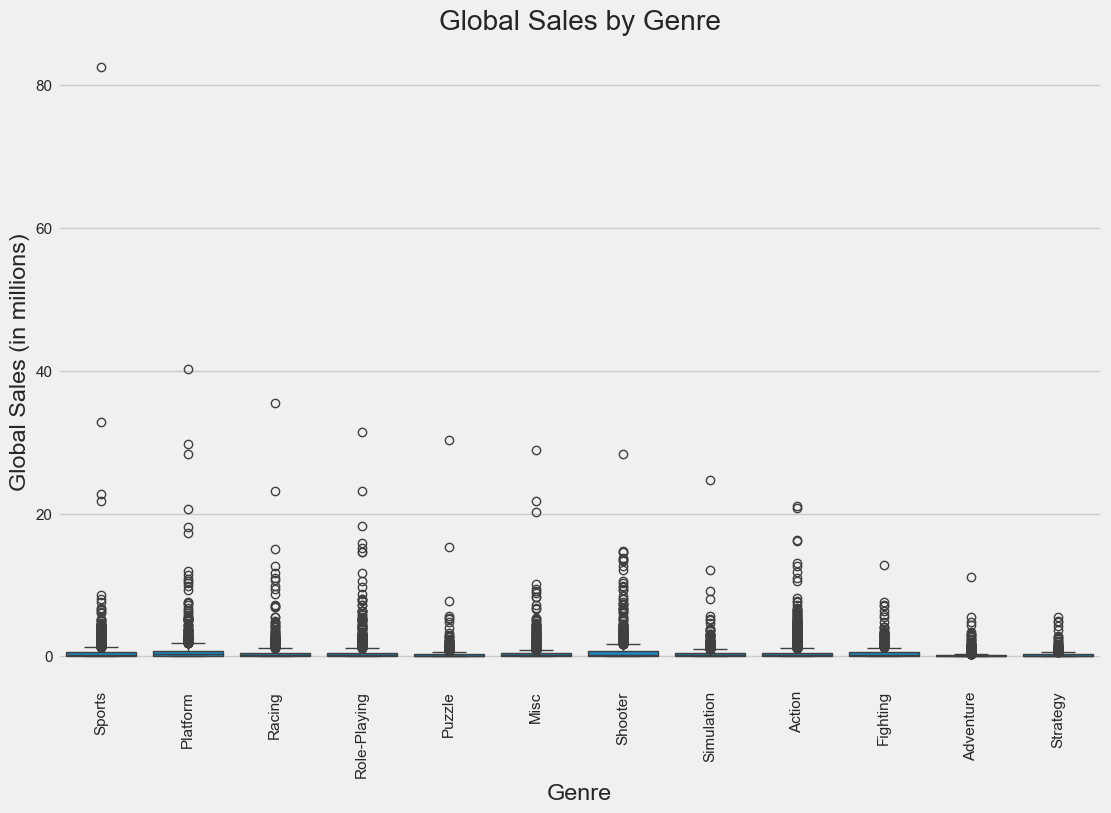

In [9]:
# 2. Sales by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()

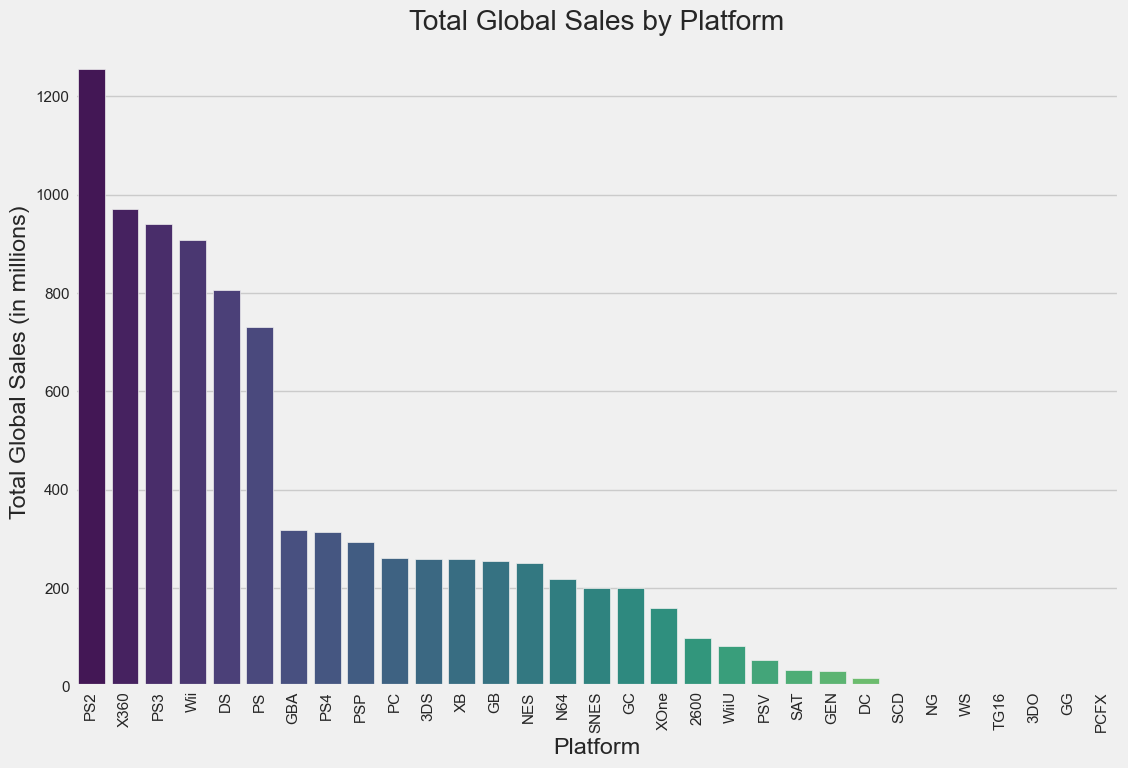

In [10]:
# 3. Sales by Platform
plt.figure(figsize=(12, 8))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

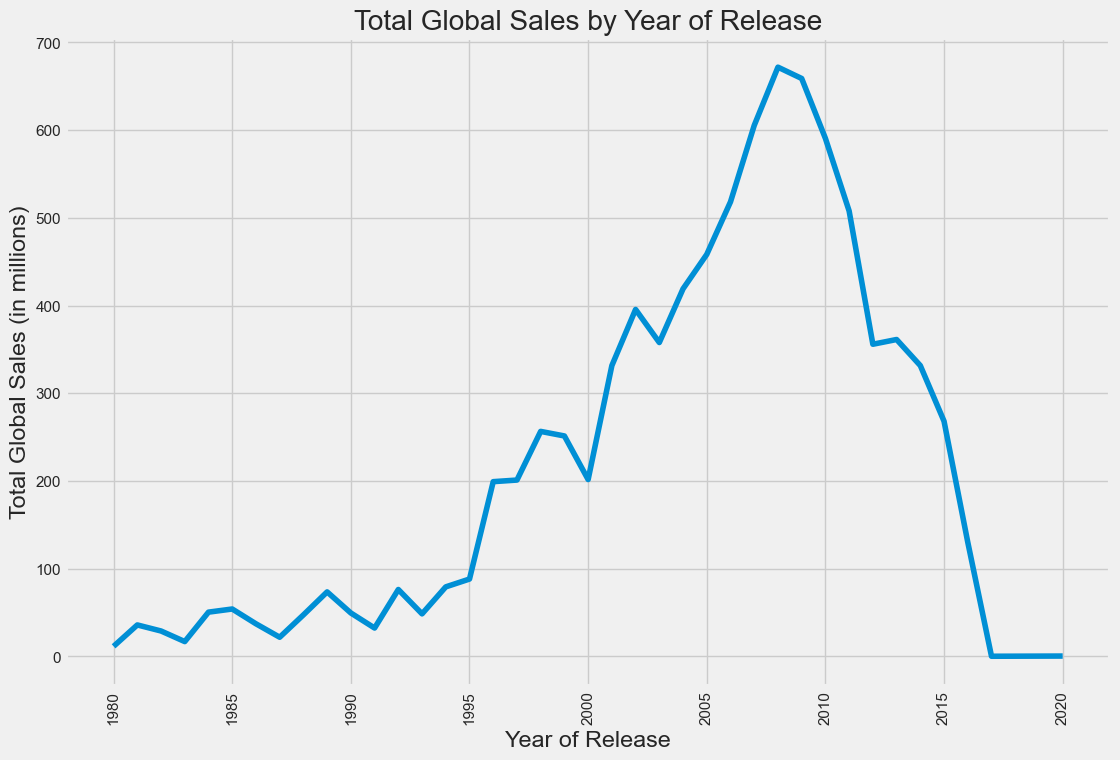

In [11]:
# 4. Sales by Year of Release
plt.figure(figsize=(12, 8))
year_sales = df.groupby('Year_of_Release')['Global_Sales'].sum().sort_index()
sns.lineplot(x=year_sales.index, y=year_sales.values)
plt.title('Total Global Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

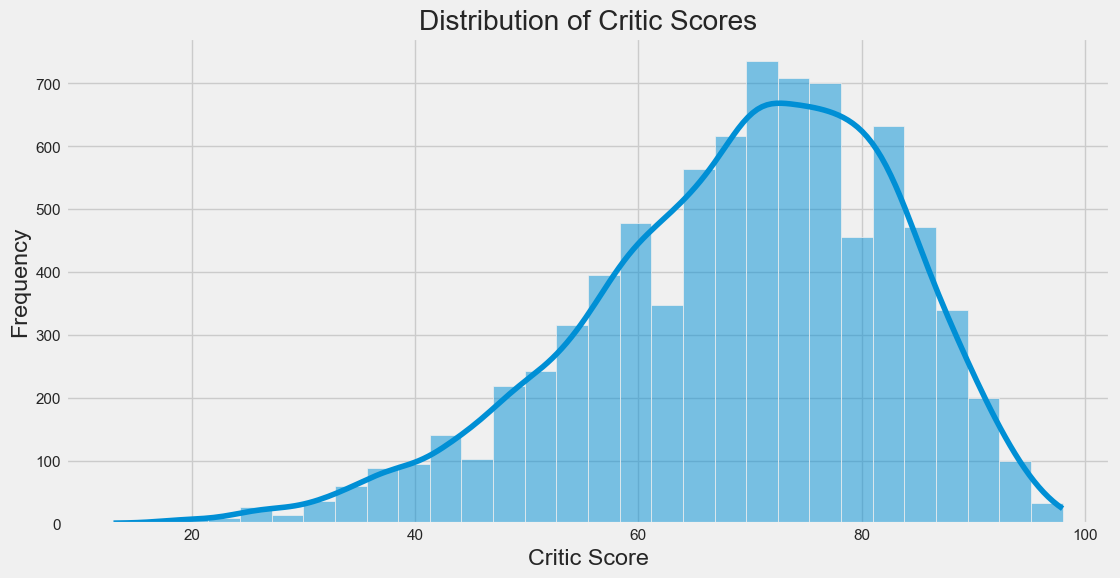

In [12]:
# 5. Distribution of Critic Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Critic_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

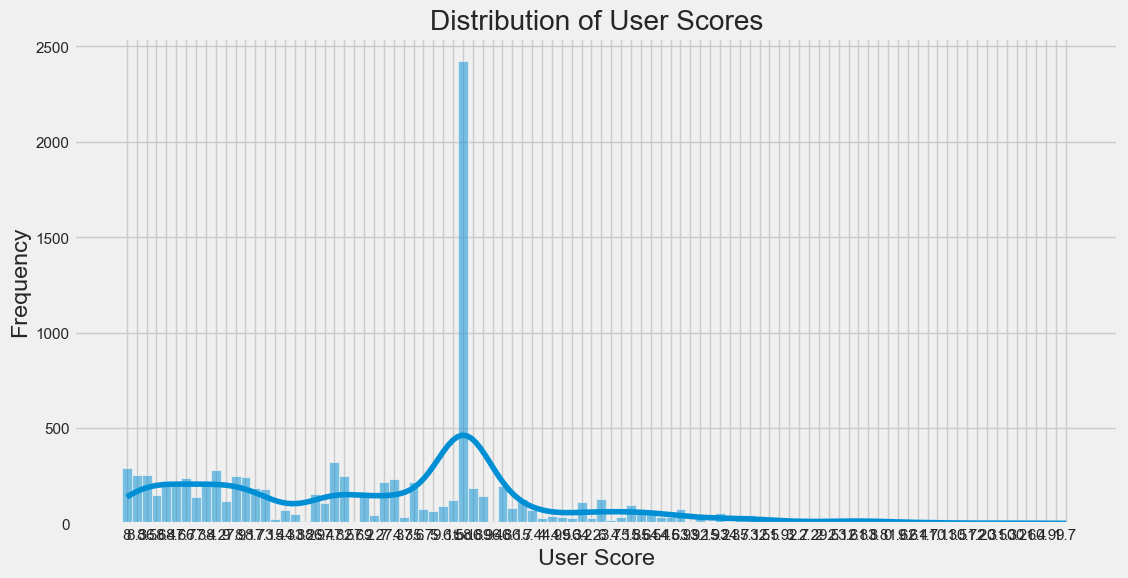

In [13]:
# 6. Distribution of User Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['User_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()

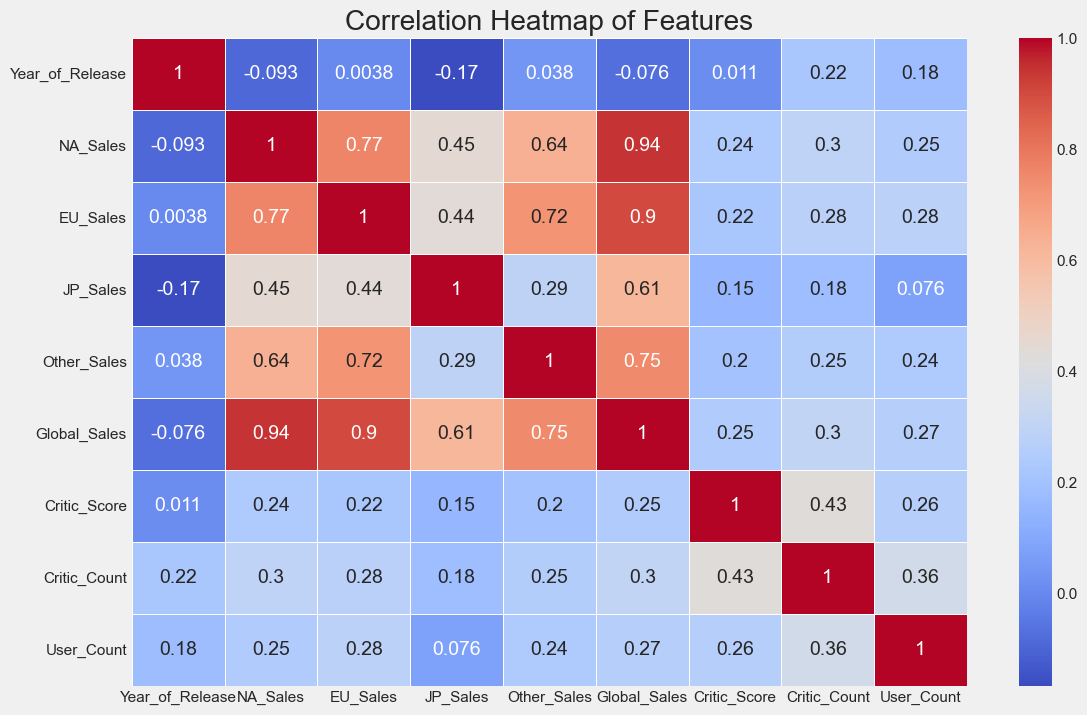

In [14]:
# 7. Correlation Heatmap (excluding non-numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

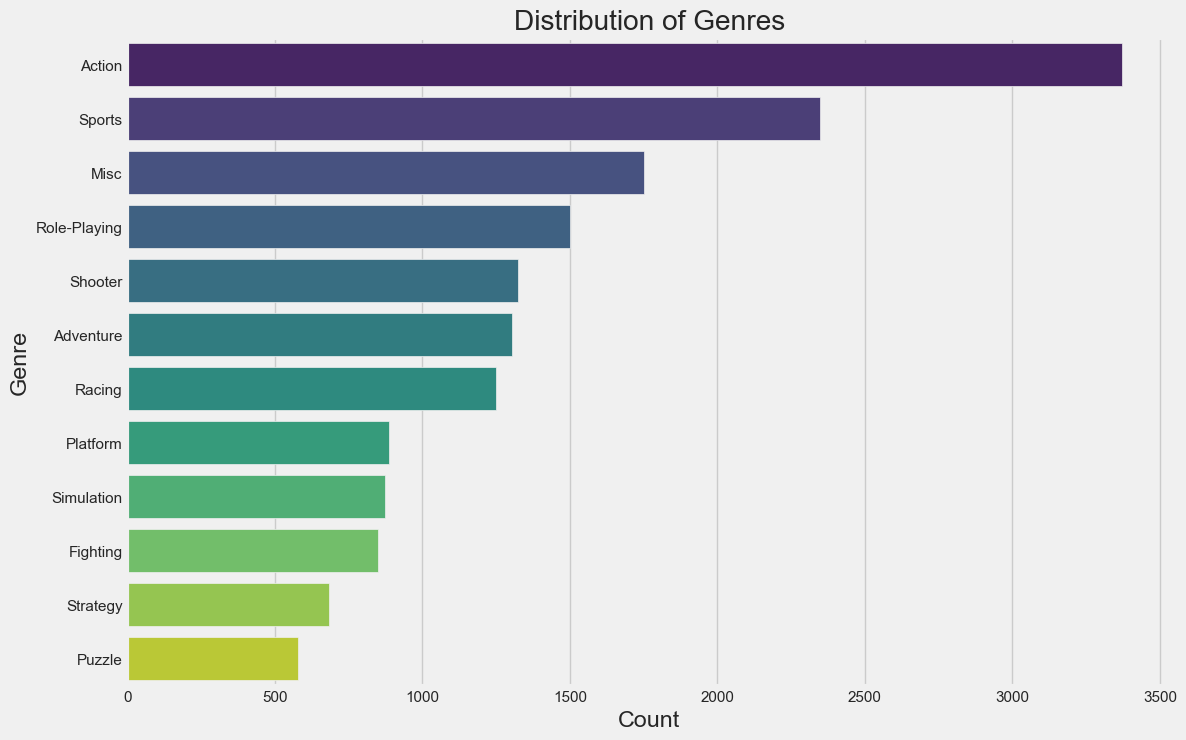

In [15]:
# 8. Distribution of Genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

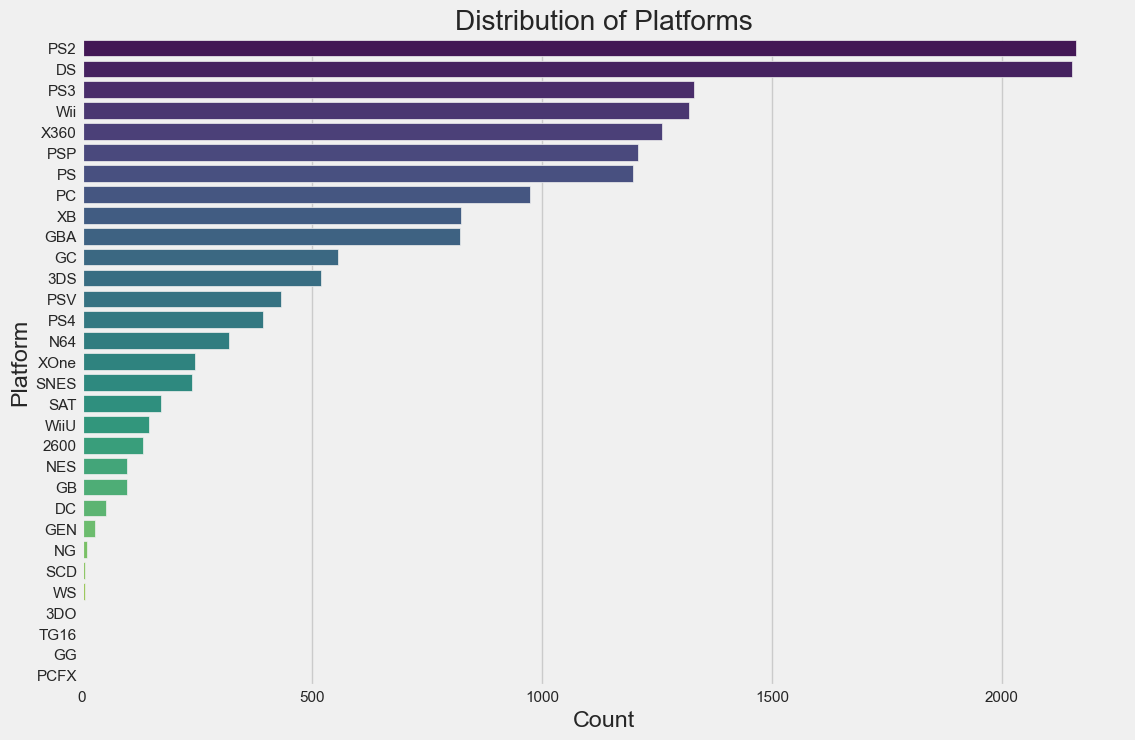

In [16]:
# 9. Distribution of Platforms
plt.figure(figsize=(12, 8))
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index, palette='viridis')
plt.title('Distribution of Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

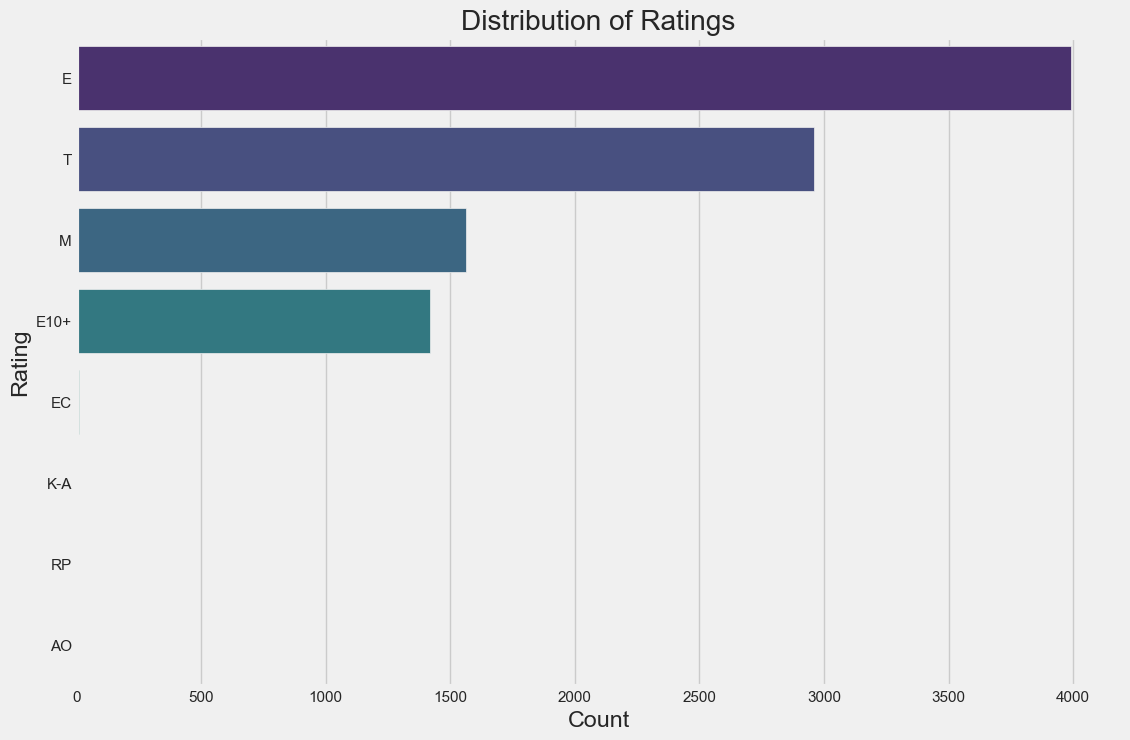

In [17]:
# 10. Distribution of Ratings
plt.figure(figsize=(12, 8))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

**Summary of Exploratory Data Analysis (EDA)**
In this EDA section, we explored the Video_Games_Sales_as_at_22_Dec_2016.csv dataset through various visualizations and statistical summaries. We analyzed the distribution of global sales, examined sales trends across different genres, platforms, and years of release, and visualized the distributions of critic and user scores. Additionally, we created a correlation heatmap to identify relationships between numerical features and explored the distributions of genres, platforms, and ratings.

We observed that there is a scarcity of data for certain platforms such as DC and certain ratings such as 'K-A', 'AO', 'EC', and 'RP'. These insights provide a deeper understanding of the dataset and will inform our data preprocessing and feature selection strategies in the subsequent steps.

## Data Cleaning and Preprocessing
The Data Cleaning and Preprocessing section focuses on preparing the dataset for modeling by handling missing values, creating new features, and transforming the data. This involves removing records with missing critical data, imputing missing values for scores, converting categorical features to dummy variables, and standardizing numerical data. These steps ensure that the dataset is clean, consistent, and suitable for building effective recommendation models.


In [18]:
# Display the initial summary of the dataset
print("Initial dataset summary:")
display(df.info())

Initial dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory u

None

In [19]:
# 1. Remove records with missing data in 'Name', 'Genre', and 'Rating'
df = df.dropna(subset=['Name', 'Genre', 'Rating'])
print("\nDataset summary after removing records with missing 'Name', 'Genre', and 'Rating':")
display(df.info())


Dataset summary after removing records with missing 'Name', 'Genre', and 'Rating':
<class 'pandas.core.frame.DataFrame'>
Index: 9950 entries, 0 to 16710
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9950 non-null   object 
 1   Platform         9950 non-null   object 
 2   Year_of_Release  9769 non-null   float64
 3   Genre            9950 non-null   object 
 4   Publisher        9943 non-null   object 
 5   NA_Sales         9950 non-null   float64
 6   EU_Sales         9950 non-null   float64
 7   JP_Sales         9950 non-null   float64
 8   Other_Sales      9950 non-null   float64
 9   Global_Sales     9950 non-null   float64
 10  Critic_Score     8054 non-null   float64
 11  Critic_Count     8054 non-null   float64
 12  User_Score       9879 non-null   object 
 13  User_Count       7504 non-null   float64
 14  Developer        9950 non-null   object 
 15  Rating           9950 non-

None

In [20]:
# 2. Create additional features for User_Score and Critic_Score and impute missing values

# Replace 'tbd' value to NaN
df['User_Score'] = np.where(df['User_Score'] == 'tbd', np.nan, df['User_Score']).astype(float)

# Group the records by Genre, then aggregate them calculating the average of both Critic Score and User Score
df_grp_by_genre = df[['Genre', 'Critic_Score', 'User_Score']].groupby('Genre', as_index=False)
df_score_mean = df_grp_by_genre.agg(Ave_Critic_Score=('Critic_Score', 'mean'), Ave_User_Score=('User_Score', 'mean'))

# Merge the average scores with the main dataframe
df = df.merge(df_score_mean, on='Genre')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Ave_Critic_Score,Ave_User_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,72.037257,6.973126
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,67.927694,7.036767
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,72.037257,6.973126
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,68.058350,7.301402
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,66.650672,6.827460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,NaN,NaN,Taito Corporation,E,67.418919,7.175000
9946,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,NaN,NaN,Interchannel-Holon,E,67.418919,7.175000
9947,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,72.254296,7.320930
9948,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,Big John Games,E,68.587896,7.136686


In [21]:
# 3. Impute missing values by calculating the mean within each genre
df['Critic_Score_Imputed'] = np.where(df['Critic_Score'].isna(), df['Ave_Critic_Score'], df['Critic_Score'])
df['User_Score_Imputed'] = np.where(df['User_Score'].isna(), df['Ave_User_Score'], df['User_Score'])

print("\nSummary statistics for User_Score and User_Score_Imputed:")
display(df[['User_Score', 'User_Score_Imputed']].describe())

print("\nSummary statistics for Critic_Score and Critic_Score_Imputed:")
display(df[['Critic_Score', 'Critic_Score_Imputed']].describe())


Summary statistics for User_Score and User_Score_Imputed:


,User_Score,User_Score_Imputed
count,7504.000000,9950.000000
mean,7.126879,7.107768
std,1.500750,1.305869
min,0.000000,0.000000
25%,6.400000,6.800000
50%,7.500000,7.136686
75%,8.200000,8.000000
max,9.700000,9.700000



Summary statistics for Critic_Score and Critic_Score_Imputed:


,Critic_Score,Critic_Score_Imputed
count,8054.000000,9950.000000
mean,68.971319,68.851751
std,13.951640,12.594336
min,13.000000,13.000000
25%,60.000000,63.000000
50%,71.000000,69.000000
75%,79.000000,77.000000
max,98.000000,98.000000


In [22]:
# 4. Drop fields related to critic and user scores except for the new features with imputed values
final_df = df.drop(columns=['User_Score', 'Critic_Score', 'Ave_Critic_Score', 'Ave_User_Score'], axis=1)
final_df = final_df.reset_index(drop=True)
final_df = final_df.rename(columns={'Critic_Score_Imputed': 'Critic_Score', 'User_Score_Imputed': 'User_Score'})

# 5. Filter out only required columns
final_df = final_df[['Name', 'Platform', 'Genre', 'Rating', 'Critic_Score', 'User_Score']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9950 non-null   object 
 1   Platform      9950 non-null   object 
 2   Genre         9950 non-null   object 
 3   Rating        9950 non-null   object 
 4   Critic_Score  9950 non-null   float64
 5   User_Score    9950 non-null   float64
dtypes: float64(2), object(4)
memory usage: 466.5+ KB


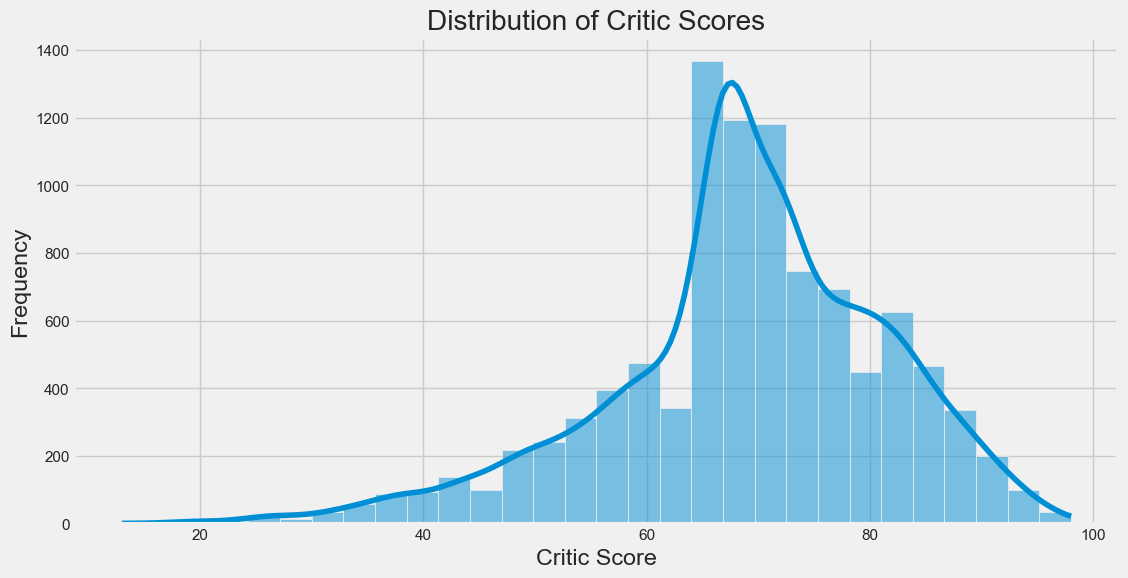

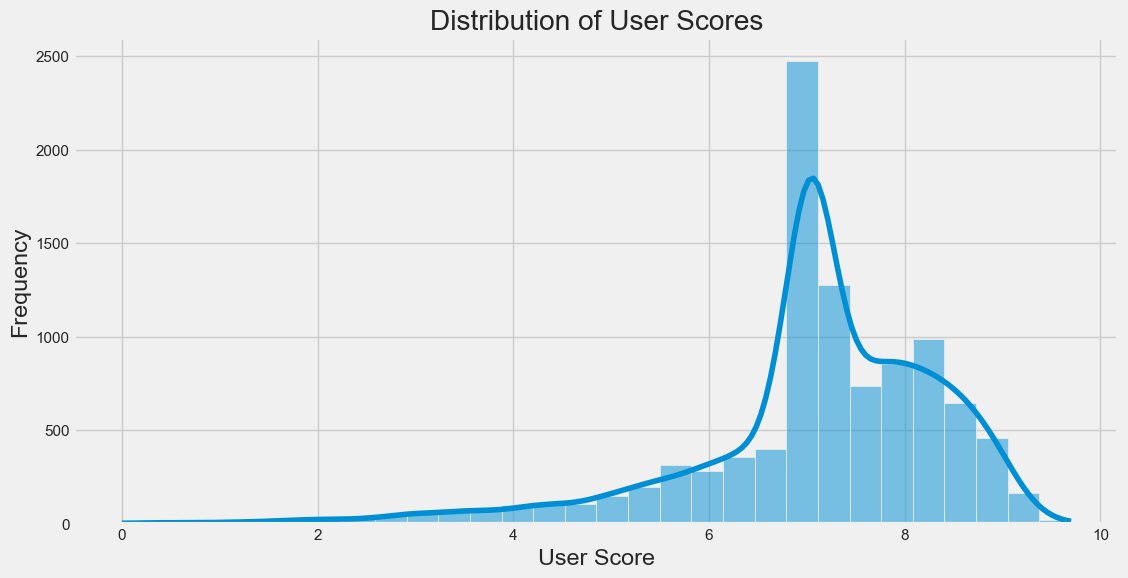

[Text(0.5, 0, 'User Score'),
 Text(0, 0.5, 'Critic Score'),
 Text(0.5, 1.0, 'User Scores vs. Critic Scores')]

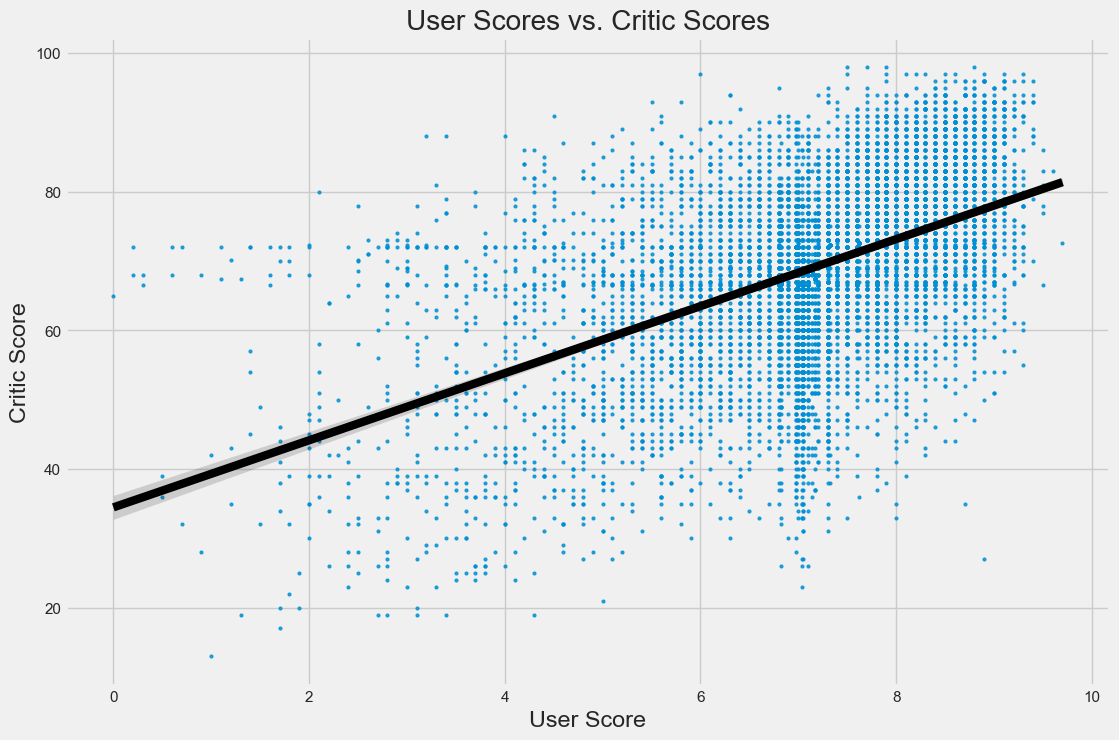

In [23]:
# 6. Analyze the data distribution for `Critic_Score` and `User_Score`

# Distribution of Critic Scores
plt.figure(figsize=(12, 6))
sns.histplot(final_df['Critic_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

# Distribution of User Scores
plt.figure(figsize=(12, 6))
sns.histplot(final_df['User_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()

# Distribution of User Scores
plt.figure(figsize=(12, 8))
ax = sns.regplot(x=final_df['User_Score'], y=final_df['Critic_Score'], line_kws={"color": "black"},
                 scatter_kws={'s': 4})
ax.set(xlabel="User Score", ylabel="Critic Score", title="User Scores vs. Critic Scores")

In [24]:
# 7. Converting Categorical Features to Dummy Indicators
categorical_features = [name for name in final_df.columns if final_df[name].dtype == 'O']
categorical_features = categorical_features[1:]  # except for the name

df_preprocessed = pd.get_dummies(data=final_df, columns=categorical_features)
df_preprocessed.head(10)

,Name,Critic_Score,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,Wii Sports,76.0,8.0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,Mario Kart Wii,82.0,8.3,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,Wii Sports Resort,80.0,8.0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,New Super Mario Bros.,89.0,8.5,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,Wii Play,58.0,6.6,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,New Super Mario Bros. Wii,87.0,8.4,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,Mario Kart DS,91.0,8.6,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,Wii Fit,80.0,7.7,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
8,Kinect Adventures!,61.0,6.3,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9,Wii Fit Plus,80.0,7.4,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [25]:
# 8. Standardizing the Numerical Features
features = df_preprocessed.drop(columns=['Name'], axis=1)
scale = StandardScaler()
scaled_features = scale.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features.head(5)

,Critic_Score,User_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0.567605,0.683282,-0.15314,-0.037537,-0.383200,-0.235302,-0.222413,-0.290432,-0.146119,-0.418178,...,2.365115,-0.187809,-0.010026,1.221929,-0.408009,-0.028367,-0.017367,-0.431694,-0.017367,-0.650896
1,1.044034,0.913026,-0.15314,-0.037537,-0.383200,-0.235302,-0.222413,-0.290432,-0.146119,-0.418178,...,-0.422812,-0.187809,-0.010026,1.221929,-0.408009,-0.028367,-0.017367,-0.431694,-0.017367,-0.650896
2,0.885224,0.683282,-0.15314,-0.037537,-0.383200,-0.235302,-0.222413,-0.290432,-0.146119,-0.418178,...,2.365115,-0.187809,-0.010026,1.221929,-0.408009,-0.028367,-0.017367,-0.431694,-0.017367,-0.650896
3,1.599867,1.066188,-0.15314,-0.037537,2.609607,-0.235302,-0.222413,-0.290432,-0.146119,-0.418178,...,-0.422812,-0.187809,-0.010026,1.221929,-0.408009,-0.028367,-0.017367,-0.431694,-0.017367,-0.650896
4,-0.861681,-0.388855,-0.15314,-0.037537,-0.383200,-0.235302,-0.222413,-0.290432,-0.146119,-0.418178,...,-0.422812,-0.187809,-0.010026,1.221929,-0.408009,-0.028367,-0.017367,-0.431694,-0.017367,-0.650896


**Summary of Data Cleaning and Preprocessing**
In the Data Cleaning and Preprocessing section, we performed several crucial steps to prepare the dataset for modeling. We removed records with missing data in the Name, Genre, and Rating features. We created additional features for `User_Score` and `Critic_Score`, imputing missing values with the mean value within each genre. We dropped fields related to critic and user scores except for the newly created imputed features and retained only the required columns.

We analyzed the data distribution for `Critic_Score` and `User_Score`, observing their distribution patterns and correlation. We transformed all categorical features into binary dummy variables and standardized numerical data to ensure that all features are on a similar scale.

The resulting preprocessed dataset has 9950 entries and 39 features, ready for building effective recommendation models. The analysis highlighted the scarcity of data for certain platforms and ratings, which will be considered during feature selection and model evaluation.

## Model Training
The Model Training section focuses on building recommendation models using the Nearest Neighbors approach with cosine similarity and Content-Based Filtering. We will encapsulate the recommendation logic within a class, providing flexibility for implementing and comparing different recommendation techniques.

### Nearest Neighbors Approach with Cosine Similarity


In [26]:
class VideoGameRecommender:
    def __init__(self, df, metric='cosine', algorithm='brute'):
        self.df = df
        self.metric = metric
        self.algorithm = algorithm
        self.model = None

    def fit(self):
        # Extracting the features
        features = self.df.drop(columns=['Name'], axis=1).values
        # Fit the NearestNeighbors model
        self.model = NearestNeighbors(metric=self.metric, algorithm=self.algorithm)
        self.model.fit(features)

    def recommend_by_title(self, game_title, n_recommendations=5):
        # Find the index of the game by title
        idx = self.df[self.df['Name'] == game_title].index[0]
        # Find the k-nearest neighbors for the game
        distances, indices = self.model.kneighbors(self.df.iloc[idx, 1:].values.reshape(1, -1),
                                                   n_neighbors=n_recommendations + 1)
        # Get the names of the recommended games
        recommendations = [self.df.iloc[i]['Name'] for i in indices.flatten()[1:]]
        return recommendations

    def recommend_by_features(self, features, n_recommendations=5):
        # Find the k-nearest neighbors for the provided features
        distances, indices = self.model.kneighbors(np.array(features).reshape(1, -1), n_neighbors=n_recommendations)
        # Get the names of the recommended games
        recommendations = [self.df.iloc[i]['Name'] for i in indices.flatten()]
        return recommendations


# Preprocessing Data
scaled_features_with_names = pd.concat([final_df['Name'], scaled_features], axis=1)

# Initialize and train the recommender
recommender = VideoGameRecommender(scaled_features_with_names)
recommender.fit()

# Example usage of the recommender
game_title = 'Call of Duty: World at War'
print(f"Recommendations for {game_title}:")
print(recommender.recommend_by_title(game_title))

# Example usage of recommending by features
example_features = scaled_features.iloc[0].values
print("Recommendations for given features:")
print(recommender.recommend_by_features(example_features))


Recommendations for Call of Duty: World at War:
['Bulletstorm', 'Battlefield 3', 'Unreal Tournament III', 'Max Payne 3', "Tom Clancy's Rainbow Six: Vegas 2"]
Recommendations for given features:
['Wii Sports', 'NHL Slapshot', 'SSX Blur', 'EA Sports Active 2', 'Wii Sports Resort']


### Content-Based Filtering


In [27]:
from sklearn.metrics.pairwise import cosine_similarity


class ContentBasedRecommender:
    def __init__(self, df):
        self.df = df
        self.similarity_matrix = None

    def fit(self):
        features = self.df.drop(columns=['Name'], axis=1).values
        self.similarity_matrix = cosine_similarity(features)

    def recommend_by_title(self, game_title, n_recommendations=5):
        idx = self.df[self.df['Name'] == game_title].index[0]
        similarity_scores = list(enumerate(self.similarity_matrix[idx]))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        recommendations = [self.df.iloc[i[0]]['Name'] for i in similarity_scores[1:n_recommendations + 1]]
        return recommendations


# Initialize and train the content-based recommender
content_recommender = ContentBasedRecommender(scaled_features_with_names)
content_recommender.fit()

# Example usage of the content-based recommender
print(f"Content-Based Recommendations for {game_title}:")
print(content_recommender.recommend_by_title(game_title))


Content-Based Recommendations for Call of Duty: World at War:
['Bulletstorm', 'Battlefield 3', 'Unreal Tournament III', 'Max Payne 3', "Tom Clancy's Rainbow Six: Vegas 2"]
